# Demo of Pandas to plot Text-Fabric Data

15 March 2017

This notebook demonstrates a way to use Pandas to plot statistics for text data from Text-Fabric to produce a plot such as one might find in many bible study programs.

In [112]:
%matplotlib inline

import pandas as pd
import matplotlib as plt
from tf.fabric import Fabric

Get the Greek data I want. 

In the end this is a vector of occurrences of δε per 1000 words in the SBL GNT in Luke.

In [113]:
TF = Fabric( modules='greek/sblgnt' )
api = TF.load('''book chapter verse oslots UnicodeLemma''')
api.makeAvailableIn(globals())

This is Text-Fabric 2.3.4
Api reference : https://github.com/ETCBC/text-fabric/wiki/Api
Tutorial      : https://github.com/ETCBC/text-fabric/blob/master/docs/tutorial.ipynb
Data sources  : https://github.com/ETCBC/text-fabric-data
Data docs     : https://etcbc.github.io/text-fabric-data
Shebanq docs  : https://shebanq.ancient-data.org/text
Slack team    : https://shebanq.slack.com/signup
Questions? Ask shebanq@ancient-data.org for an invite to Slack
61 features found and 0 ignored
  0.00s loading features ...
   |     0.19s B oslots               from C:/Users/Daniel/github/text-fabric-data/greek/sblgnt
   |     0.00s B book                 from C:/Users/Daniel/github/text-fabric-data/greek/sblgnt
   |     0.00s B chapter              from C:/Users/Daniel/github/text-fabric-data/greek/sblgnt
   |     0.00s B verse                from C:/Users/Daniel/github/text-fabric-data/greek/sblgnt
   |     0.07s B UnicodeLemma         from C:/Users/Daniel/github/text-fabric-data/greek/sblgnt
   | 

In [114]:
indent(reset=True)
info('Counting nodes ...')
i, num_de = 0, 0
stats = []
n = T.nodeFromSection(('Luke', 1 ,1), lang='en')
print(f'starting verse node number of Luke {n}')
luke_bn = T.bookNode("Luke", lang="en")
luke_cns = L.d(luke_bn, otype='chapter')
luke_vns=[]
[luke_vns.extend(L.d(x, otype='verse')) for x in luke_cns]
luke_wds=[]
[luke_wds.extend(L.d(x, otype='word')) for x in luke_vns]
print(f'Book node for Luke {luke_bn}')
print(f'number of chapters in Luke {len(luke_cns)}')
print(f'number of verses in Luke {len(luke_vns)}')
print(f'number of words in Luke {len(luke_wds)}')

luke_word_nodes = L.d(luke_bn, otype='word')
print(f'number of words in Luke directly {len(luke_word_nodes)}')
print(f'First word slot number in Luke is {luke_word_nodes[0]}')
for n in luke_word_nodes:
    w = F.UnicodeLemma.v(n)
    i += 1
    if w in ('δέ'):
        num_de += 1
    if i % 1000 == 0 or i >= len(luke_word_nodes):
        stats.append(num_de)
        num_de = 0
print(f'Number of δε in Luke by group of 1000 words = {stats}')
print(f'length of stats = {len(stats)}')

  0.00s Counting nodes ...
starting verse node number of Luke 421354
Book node for Luke 137797
number of chapters in Luke 24
number of verses in Luke 1149
number of words in Luke 19446
number of words in Luke directly 19446
First word slot number in Luke is 29616
Number of δε in Luke by group of 1000 words = [15, 11, 16, 24, 22, 26, 41, 44, 38, 25, 29, 18, 27, 28, 34, 28, 25, 44, 38, 9]
length of stats = 20


Now create a Pandas Series from this data

In [115]:
ds = pd.Series(stats, index=range(1,len(stats)+1))
ds.describe()

count    20.000000
mean     27.100000
std      10.361365
min       9.000000
25%      21.000000
50%      26.500000
75%      35.000000
max      44.000000
dtype: float64

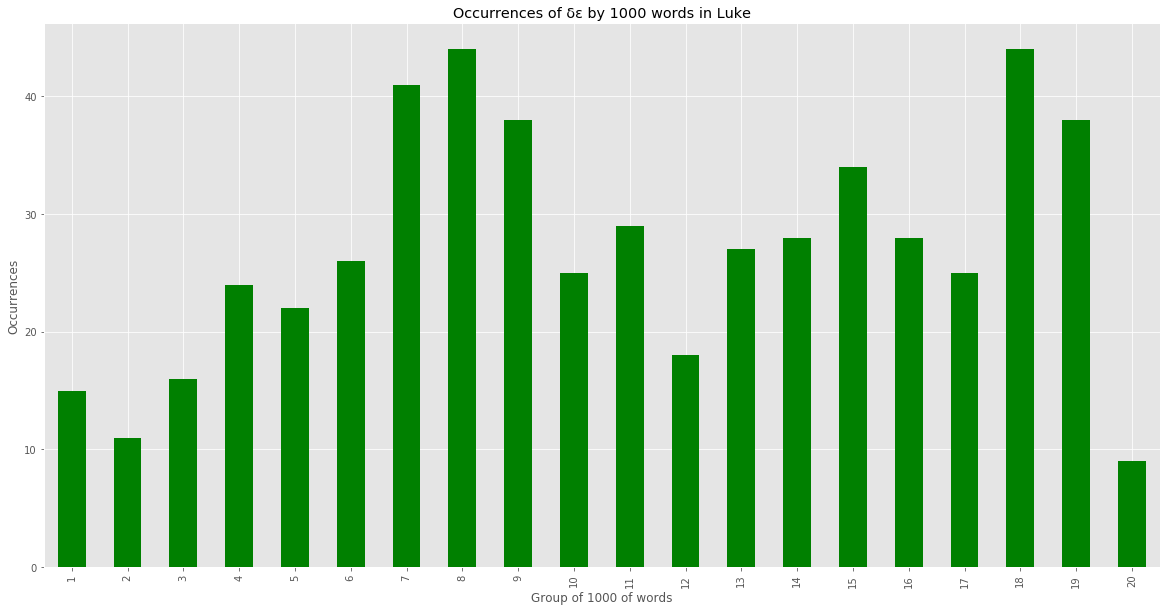

In [116]:
plt.pyplot.style.use('ggplot')
plt.pyplot.figure(figsize=(20,10))
gr = ds.plot(kind='bar', color='g')
gr.set_title('Occurrences of δε by 1000 words in Luke')
gr.set_xlabel('Group of 1000 of words')
gr.set_ylabel('Occurrences')
